In [1]:
# From https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/ 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import recall_score, classification_report
wine = pd.read_csv('../datasets/wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [3]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [4]:
X = X[(y == 3) | (y == 8)]
y = y[(y == 3) | (y == 8)]
X = X[['residual sugar', 'alcohol']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

0.916666666667
0.75
0.833333333333


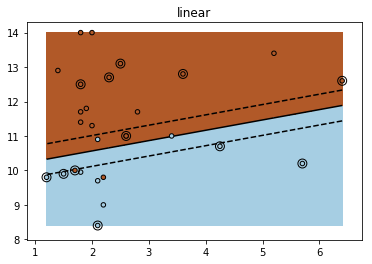

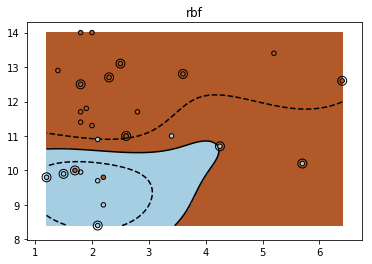

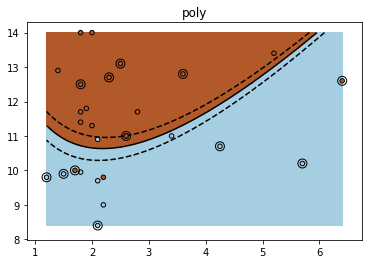

In [6]:
# fit the model using ovo shape
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel,decision_function_shape='ovo')
    clf.fit(X_train, y_train)

    accur = clf.score(X_test, y_test)
    
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test.values[:, 0], X_test.values[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X.values[:, 0].min()
    x_max = X.values[:, 0].max()
    y_min = X.values[:, 1].min()
    y_max = X.values[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    print accur
    plt.title(kernel)
    
plt.show()

/home/rocket/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


0.583333333333
0.916666666667
0.833333333333
0.833333333333
0.833333333333


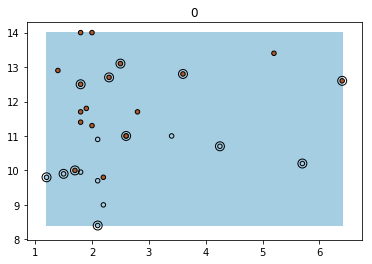

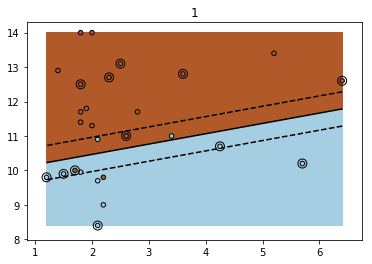

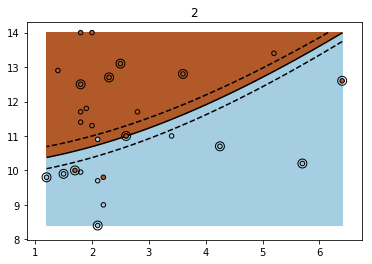

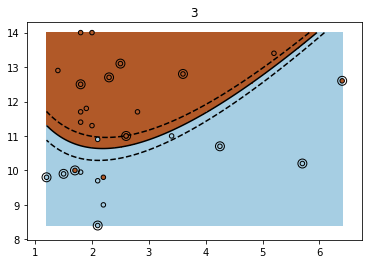

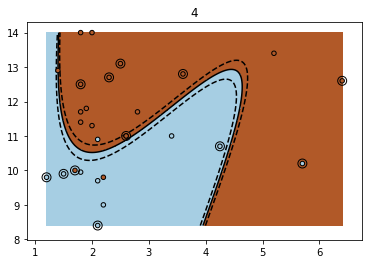

In [7]:
# fit the model using ovo shape
for i in xrange(5):
    clf = svm.SVC(kernel='poly',decision_function_shape='ovo', degree=i)
    clf.fit(X_train, y_train)

    accur = clf.score(X_test, y_test)
    
    plt.figure(i)
    plt.clf()
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test.values[:, 0], X_test.values[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X.values[:, 0].min()
    x_max = X.values[:, 0].max()
    y_min = X.values[:, 1].min()
    y_max = X.values[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    print accur
    plt.title(i)
    
plt.show()

0.75
0.583333333333
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


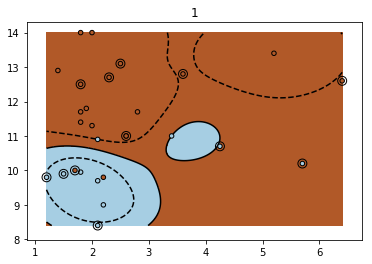

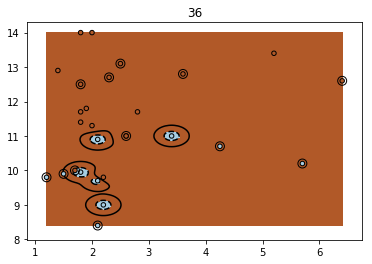

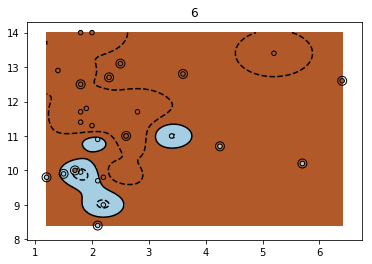

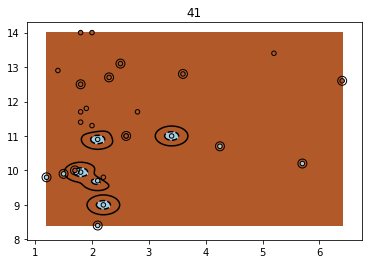

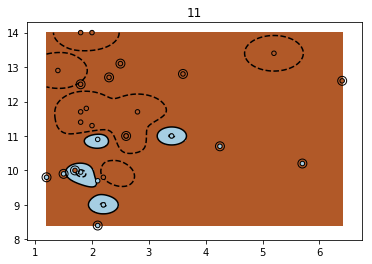

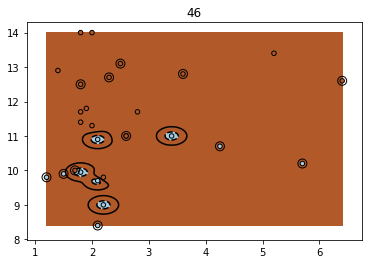

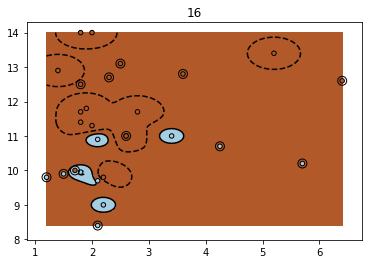

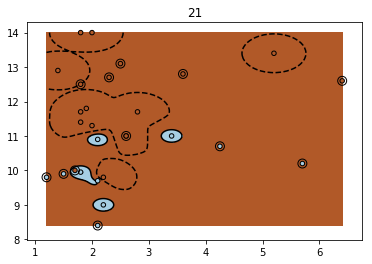

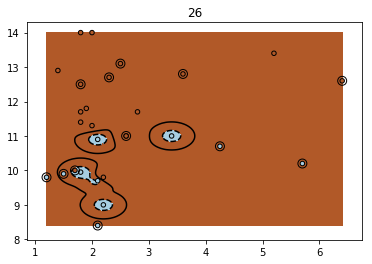

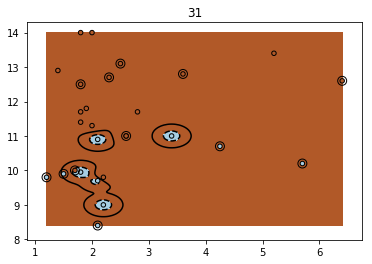

In [8]:
# fit the model using ovo shape
for i in xrange(1, 50, 5):
    clf = svm.SVC(kernel='rbf',decision_function_shape='ovr', gamma=i)
    clf.fit(X_train, y_train)

    accur = clf.score(X_test, y_test)
    
    plt.figure(i)
    plt.clf()
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test.values[:, 0], X_test.values[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X.values[:, 0].min()
    x_max = X.values[:, 0].max()
    y_min = X.values[:, 1].min()
    y_max = X.values[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    print accur
    plt.title(i)
    
plt.show()

In [9]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=False)
df = pd.DataFrame.from_dict(scores)
df.head()

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro
0,0.000802,0.000987,0.833333,0.833333,0.875000
1,0.000607,0.000878,1.000000,1.000000,1.000000
2,0.000594,0.001549,0.666667,0.333333,0.500000
3,0.000737,0.000891,1.000000,1.000000,1.000000
4,0.000587,0.000879,0.800000,0.833333,0.833333


In [10]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']
clf = svm.SVC(kernel='rbf', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=False)
df = pd.DataFrame.from_dict(scores)
df.head()

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro
0,0.000745,0.000955,0.833333,0.833333,0.875000
1,0.000630,0.001023,0.666667,0.750000,0.750000
2,0.000603,0.000932,0.666667,0.333333,0.500000
3,0.000582,0.000869,1.000000,1.000000,1.000000
4,0.000578,0.000900,0.800000,0.833333,0.833333


In [11]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']
clf = svm.SVC(kernel='poly', C=1, random_state=0, degree=3)
scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=False)
df = pd.DataFrame.from_dict(scores)
df.head()

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro
0,0.007633,0.000918,0.666667,0.750000,0.750000
1,0.218227,0.000991,0.666667,0.750000,0.750000
2,0.001833,0.000924,0.666667,0.333333,0.500000
3,0.046210,0.000912,1.000000,1.000000,1.000000
4,0.002419,0.000860,0.800000,0.833333,0.833333


In [12]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4]}]

scores = ['accuracy', 'precision_macro', 'recall_macro']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y, clf.predict(X)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:
()
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
()
Grid scores on development set:
()
0.750 (+/-0.280) for {'kernel': 'rbf', 'C': 1, 'gamma': 1}
0.643 (+/-0.064) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.643 (+/-0.064) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.643 (+/-0.064) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.643 (+/-0.436) for {'kernel': 'rbf', 'C': 10, 'gamma': 1}
0.857 (+/-0.257) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.643 (+/-0.064) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.643 (+/-0.064) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.571 (+/-0.395) for {'kernel': 'rbf', 'C': 100, 'gamma': 1}
0.821 (+/-0.302) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.857 (+/-0.257) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.643 (+/-0.064) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.500 (+/-0.602) for {'kernel': 'rbf', 'C': 1000, 'gamma': 1}
0.750 (+/-0